In [96]:
import numpy as np 
import pandas as pd

In [97]:
salary = pd.read_csv(r"E:\python\mathmatic\datas\salary_data.csv")
salary

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [106]:
class Linear_Regression():
    def __init__(self, learning_rate, no_of_iteration):
        self.learning_rate = learning_rate
        self.no_of_iteration = no_of_iteration
        
    def fit(self, X, y):
        self.m, self.n = X.shape 
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.y = y
        for i in range(self.no_of_iteration):
            self.update_weights()
            
    def update_weights(self):
        y_pred = self.predict(self.X)
        dw = -(2 * (self.X.T).dot(self.y - y_pred)) / self.m
        db = - 2 * np.sum(self.y - y_pred) / self.m
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db
        
    def predict(self, X):
        return X.dot(self.w) + self.b
    
        

In [99]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [100]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [101]:
salary.shape

(30, 2)

In [102]:
X = salary.iloc[:,:-1].values
y = salary.iloc[:,1].values

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

In [118]:
model = Linear_Regression(learning_rate=0.02, no_of_iteration=100)
model.fit(X_train, y_train)


In [119]:
print(f'weight: {model.w[0]}'), print(f'bias: {model.b}')

weight: 10941.258155090314
bias: 13499.045037502532


(None, None)

In [120]:
pred = model.predict(X_test)

In [121]:
print(f"test data prediction: {pred}")

test data prediction: [ 27722.68063912  25534.4290081   62734.70673541  53981.70021134
  91181.97793864  79146.59396804 103217.36190924  46322.81950277
  35381.56134768  87899.60049212]


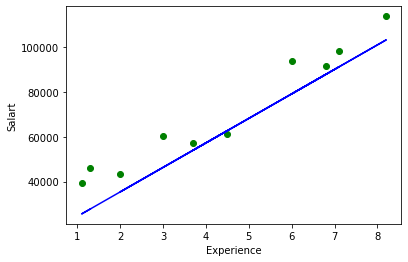

In [122]:
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, pred, color='blue')
plt.xlabel("Experience")
plt.ylabel('Salart')
plt.show();